<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li></ul></div>

## Load data

In [1]:
from mantisshrimp.all import *
import pandas as pd

In [2]:
source = Path('/home/lgvaz/.data/imaterialist/')

In [3]:
df = pd.read_csv(source/'train.csv', nrows=1000)

In [4]:
df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219


In [5]:
o = df.iloc[0]

In [6]:
class MaterialInfoParser(ImageParser):
    def __iter__(self): return self.data.itertuples()
    def iid(self, o): return o.ImageId
    def file_path(self, o): return self.source/f'train/{o.ImageId}.jpg'
    def height(self, o): return o.Height
    def width(self, o): return o.Width
    def oid(self, o): return o.ClassId # TODO: AttributeIds

In [11]:
class MaterialAnnotParser(AnnotationParser):
    def __iter__(self): return self.data.itertuples()
    def iid(self, o): return o.ImageId
#     def oid(self, o): return o.ClassId
    def oid(self, o): return self.catmap.id2i[o.ClassId]
    def seg(self, o): return RLE.from_kaggle(lmap(int, o.EncodedPixels.split(' ')))
    def bbox(self, o):
        rle = self.seg(o)
        return BBox.from_rle(rle, o.Height, o.Width)

In [12]:
labels_descriptions = json.load((source/'label_descriptions.json').open())
cats = [Category(o['id'], o['name']) for o in labels_descriptions['categories']]
catmap = CategoryMap(cats)

In [13]:
parser = DataParser(df, source, catmap, img_parser=MaterialInfoParser, annot_parser=MaterialAnnotParser)
rtrain, rvalid = parser.parse()


Removed 0 images that don't have annotations


In [14]:
catmap

<CategoryMap with 47 categories>

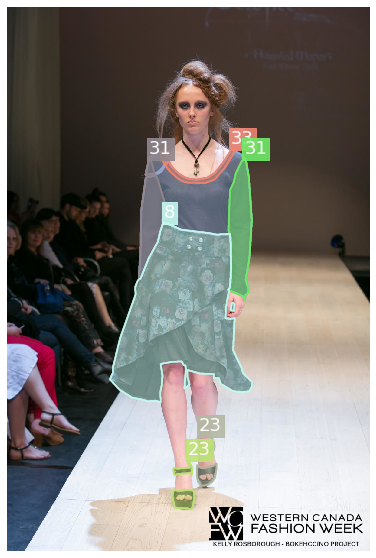

In [10]:
show_record(rtrain[42], bbox=False)

In [44]:
names = [o['name'] for o in cats]
ids = [o['id'] for o in cats]

In [53]:
vocab = {i+1:oid for i,oid in enumerate(cats2)}
vocab[0] = Category(name='background')

In [54]:
vocab

{1: Category(id=0, name='shirt, blouse'),
 2: Category(id=1, name='top, t-shirt, sweatshirt'),
 3: Category(id=2, name='sweater'),
 4: Category(id=3, name='cardigan'),
 5: Category(id=4, name='jacket'),
 6: Category(id=5, name='vest'),
 7: Category(id=6, name='pants'),
 8: Category(id=7, name='shorts'),
 9: Category(id=8, name='skirt'),
 10: Category(id=9, name='coat'),
 11: Category(id=10, name='dress'),
 12: Category(id=11, name='jumpsuit'),
 13: Category(id=12, name='cape'),
 14: Category(id=13, name='glasses'),
 15: Category(id=14, name='hat'),
 16: Category(id=15, name='headband, head covering, hair accessory'),
 17: Category(id=16, name='tie'),
 18: Category(id=17, name='glove'),
 19: Category(id=18, name='watch'),
 20: Category(id=19, name='belt'),
 21: Category(id=20, name='leg warmer'),
 22: Category(id=21, name='tights, stockings'),
 23: Category(id=22, name='sock'),
 24: Category(id=23, name='shoe'),
 25: Category(id=24, name='bag, wallet'),
 26: Category(id=25, name='scarf'

In [37]:
# TODO: add background
id2cat = {o['id']:o['name'] for o in cats}
# if 0 in id2cat: id2cat = {k+1:v for k,v in id2cat.items()}
# id2cat[0] = 'background'

In [34]:
id2cat

{1: 'shirt, blouse',
 2: 'top, t-shirt, sweatshirt',
 3: 'sweater',
 4: 'cardigan',
 5: 'jacket',
 6: 'vest',
 7: 'pants',
 8: 'shorts',
 9: 'skirt',
 10: 'coat',
 11: 'dress',
 12: 'jumpsuit',
 13: 'cape',
 14: 'glasses',
 15: 'hat',
 16: 'headband, head covering, hair accessory',
 17: 'tie',
 18: 'glove',
 19: 'watch',
 20: 'belt',
 21: 'leg warmer',
 22: 'tights, stockings',
 23: 'sock',
 24: 'shoe',
 25: 'bag, wallet',
 26: 'scarf',
 27: 'umbrella',
 28: 'hood',
 29: 'collar',
 30: 'lapel',
 31: 'epaulette',
 32: 'sleeve',
 33: 'pocket',
 34: 'neckline',
 35: 'buckle',
 36: 'zipper',
 37: 'applique',
 38: 'bead',
 39: 'bow',
 40: 'flower',
 41: 'fringe',
 42: 'ribbon',
 43: 'rivet',
 44: 'ruffle',
 45: 'sequin',
 46: 'tassel',
 0: 'background'}

In [28]:
cats

[{'id': 0, 'name': 'shirt, blouse', 'supercategory': 'upperbody', 'level': 2},
 {'id': 1,
  'name': 'top, t-shirt, sweatshirt',
  'supercategory': 'upperbody',
  'level': 2},
 {'id': 2, 'name': 'sweater', 'supercategory': 'upperbody', 'level': 2},
 {'id': 3, 'name': 'cardigan', 'supercategory': 'upperbody', 'level': 2},
 {'id': 4, 'name': 'jacket', 'supercategory': 'upperbody', 'level': 2},
 {'id': 5, 'name': 'vest', 'supercategory': 'upperbody', 'level': 2},
 {'id': 6, 'name': 'pants', 'supercategory': 'lowerbody', 'level': 2},
 {'id': 7, 'name': 'shorts', 'supercategory': 'lowerbody', 'level': 2},
 {'id': 8, 'name': 'skirt', 'supercategory': 'lowerbody', 'level': 2},
 {'id': 9, 'name': 'coat', 'supercategory': 'wholebody', 'level': 2},
 {'id': 10, 'name': 'dress', 'supercategory': 'wholebody', 'level': 2},
 {'id': 11, 'name': 'jumpsuit', 'supercategory': 'wholebody', 'level': 2},
 {'id': 12, 'name': 'cape', 'supercategory': 'wholebody', 'level': 2},
 {'id': 13, 'name': 'glasses', 'su

In [26]:
labels_descriptions.keys()

dict_keys(['categories', 'attributes'])

In [25]:
labels_descriptions

{'categories': [{'id': 0,
   'name': 'shirt, blouse',
   'supercategory': 'upperbody',
   'level': 2},
  {'id': 1,
   'name': 'top, t-shirt, sweatshirt',
   'supercategory': 'upperbody',
   'level': 2},
  {'id': 2, 'name': 'sweater', 'supercategory': 'upperbody', 'level': 2},
  {'id': 3, 'name': 'cardigan', 'supercategory': 'upperbody', 'level': 2},
  {'id': 4, 'name': 'jacket', 'supercategory': 'upperbody', 'level': 2},
  {'id': 5, 'name': 'vest', 'supercategory': 'upperbody', 'level': 2},
  {'id': 6, 'name': 'pants', 'supercategory': 'lowerbody', 'level': 2},
  {'id': 7, 'name': 'shorts', 'supercategory': 'lowerbody', 'level': 2},
  {'id': 8, 'name': 'skirt', 'supercategory': 'lowerbody', 'level': 2},
  {'id': 9, 'name': 'coat', 'supercategory': 'wholebody', 'level': 2},
  {'id': 10, 'name': 'dress', 'supercategory': 'wholebody', 'level': 2},
  {'id': 11, 'name': 'jumpsuit', 'supercategory': 'wholebody', 'level': 2},
  {'id': 12, 'name': 'cape', 'supercategory': 'wholebody', 'level':

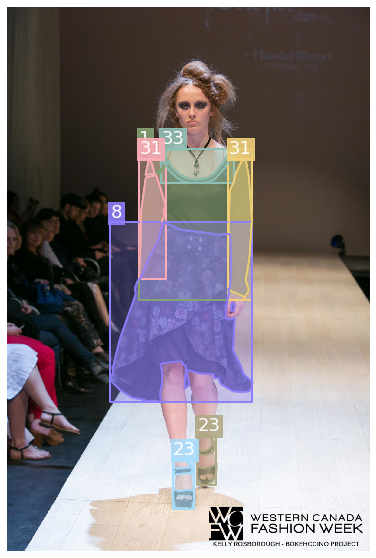

In [14]:
r = random.choice(rtrain)
show_record(r)

In [26]:
rle = RLE.from_string(o.EncodedPixels)

In [27]:
fp = source/f'train/{o.ImageId}.jpg'
im = open_img(fp)

In [28]:
mask = rle.to_mask(o.Height, o.Width)

In [35]:
mask[None]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [11]:
bbox = BBox.from_rle(rle, o.Height, o.Width)

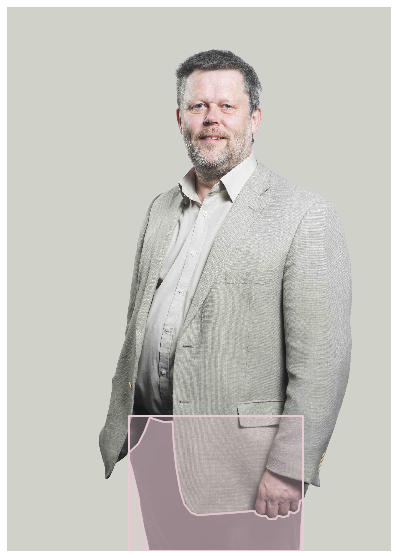

In [13]:
show_annot(im, masks=Mask(mask[None]), bboxes=[bbox])